### Week1授業前課題１ 曽呂利新左衛門問題

#### 【課題】100日後の米粒の数

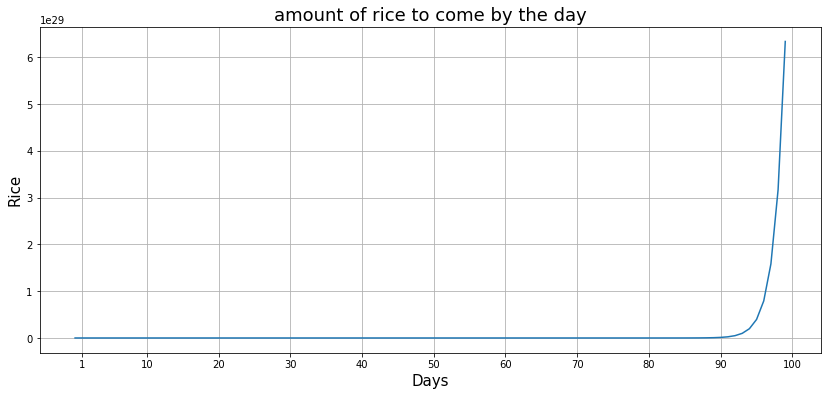

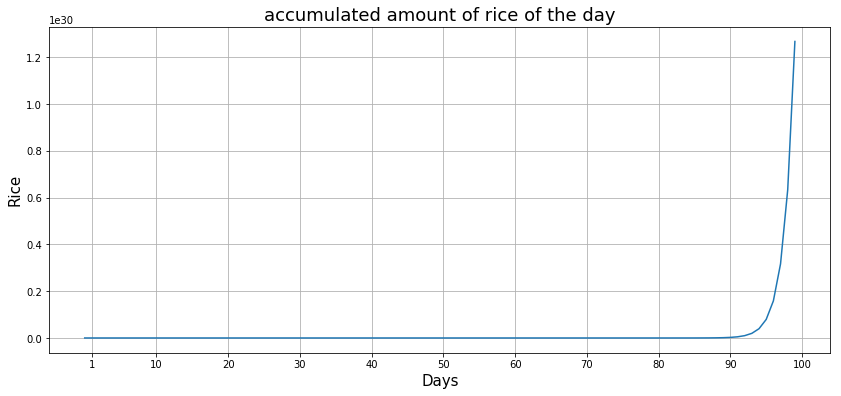

In [162]:
'''
100日後の米粒を計算するコード
「その日にもらう米の数　」「その日までに累計で貰う米の数」を折れ線グラフに出力
'''
import matplotlib.pyplot as plt
%matplotlib inline

list_n_grains = [] # ある日に貰う米の数のリスト
list_total_grains = [] # ある日までに累計で貰う米の数のリスト
list_n_grains.append(1) # 要素０に１を格納
list_total_grains.append(1)# 要素0に１を格納
days = 100
n_total = 0 # その日に貰う米の数を格納する変数
t_total = 0 # その日までに累計で貰う米の数を格納する変数

'''
「その日にもらう米の数　」「その日までに累計で貰う米の数」を計算
「その日にもらう米の数　」 = 前のリストの要素を２倍
「その日までに累計で貰う米の数」 = [その日にもらう米のリスト(要素３の値)+その日までに累計で貰う米の数(要素2の値)※三日後に累計でもらう米の数
'''
for n in range(1, days):
    n_total = list_n_grains[n-1] * 2
    list_n_grains.append(n_total)
    t_total = list_n_grains[n] + list_total_grains[n-1]
    list_total_grains.append(t_total)

# 引数を与えず現在値を確認する
#print(plt.xlim()) # x軸の範囲
#print(plt.xticks()) # x軸の目盛り値

# その日にもらう米の数のグラフ
plt.figure(figsize=(14, 6))
plt.plot(list_n_grains)
plt.xticks([1,10,20,30,40,50,60,70,80,90,100]) # x軸の目盛り値を設定
plt.title("amount of rice to come by the day", fontsize=18)
plt.xlabel("Days", fontsize=15)
plt.ylabel("Rice", fontsize=15)
plt.grid(True)
plt.show()

# その日までに累計で貰う米の数のグラフ
plt.figure(figsize=(14, 6))
plt.plot(list_total_grains)
plt.xticks([1,10,20,30,40,50,60,70,80,90,100]) # x軸の目盛り値を設定
plt.title("accumulated amount of rice of the day", fontsize=18)
plt.xlabel("Days", fontsize=15)
plt.ylabel("Rice", fontsize=15)
plt.grid(True)
plt.show()

#### 【課題】100日後以外の米粒の数

何日の米粒を貰いますか？：10


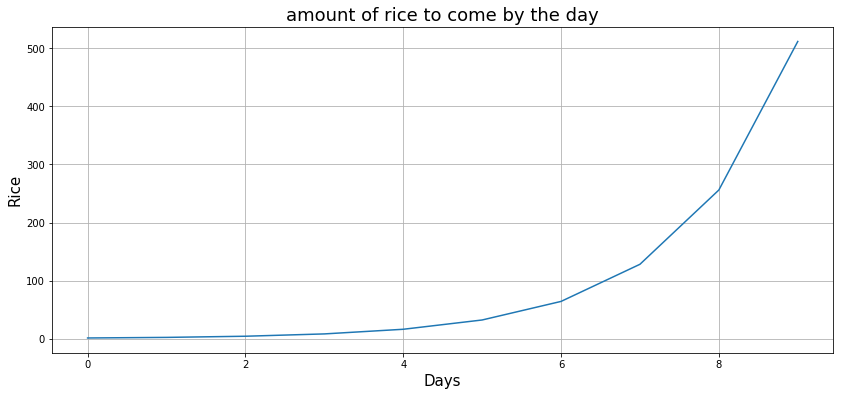

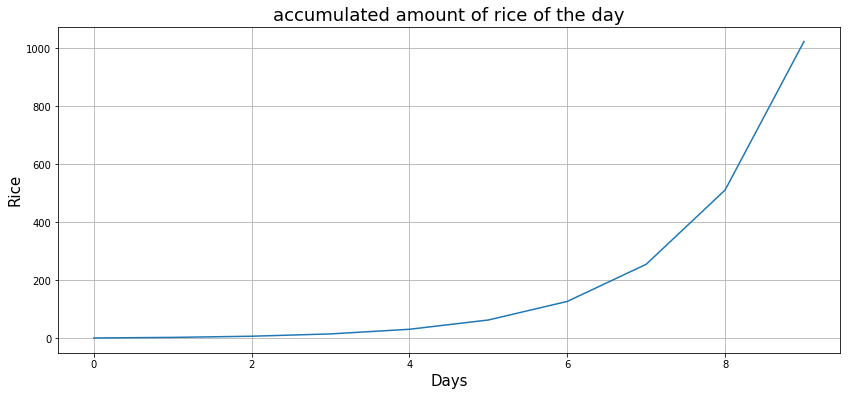

In [214]:
'''
何日後の米粒を計算する関数を定義するコード
'''
import matplotlib.pyplot as plt
%matplotlib inline

# 指定した日数の累計とその日の米粒を計算する関数
def compute_sorori_shinzaemon(day=100):
    list_n_grains = [] # ある日に貰う米の数のリスト
    list_total_grains = [] # ある日までに累計で貰う米の数のリスト
    list_n_grains.append(1) # 要素０に１を格納
    list_total_grains.append(1)# 要素0に１を格納
    n_total = 0 # その日に貰う米の数を格納する変数
    t_total = 0 # その日までに累計で貰う米の数を格納する変数

    '''
    「その日にもらう米の数　」「その日までに累計で貰う米の数」を計算
    「その日にもらう米の数　」 = 前のリストの要素を２倍
    「その日までに累計で貰う米の数」 = [その日にもらう米のリスト(要素３の値)+その日までに累計で貰う米の数(要素2の値)※三日後に累計でもらう米の数
    '''
    for n in range(1, day):
        n_total = list_n_grains[n-1] * 2
        list_n_grains.append(n_total)
        t_total = list_n_grains[n] + list_total_grains[n-1]
        list_total_grains.append(t_total)

    return list_n_grains, list_total_grains

ans = input("何日の米粒を貰いますか？：")
ans = int(ans)
list_n_grains, list_total_grains = compute_sorori_shinzaemon(day=ans)

# その日にもらう米の数のグラフ
plt.figure(figsize=(14, 6))
plt.plot(list_n_grains)
#plt.xticks([1,10,20,30,40,50,60,70,80,90,100) # x軸の目盛り値を設定
plt.title("amount of rice to come by the day", fontsize=18)
plt.xlabel("Days", fontsize=15)
plt.ylabel("Rice", fontsize=15)
plt.grid(True)
plt.show()

# その日までに累計で貰う米の数のグラフ
plt.figure(figsize=(14, 6))
plt.plot(list_total_grains)
#plt.xticks([1,10,20,30,40,50,60,70,80,90,100]) # x軸の目盛り値を設定
plt.title("accumulated amount of rice of the day", fontsize=18)
plt.xlabel("Days", fontsize=15)
plt.ylabel("Rice", fontsize=15)
plt.grid(True)
plt.show()

#### 【課題】何人が何日生活できる米か

###### 前提条件
- 米以外の食べ物や飲み物は取り入れることができます。
-  一日の摂取エネルギー必要量は2,250kcal となります。
    - 年齢：30-49、身体活動レベル低い
- 米1合を炊いたご飯のカロリーは550kcal となります。
- 一日に摂取する米は３合(カロリー:1,650kcal)となります。
- 米粒6482粒で一合とします。

[一日に必要なエネルギー量と摂取の目安(農林水産省)](http://www.maff.go.jp/j/syokuiku/zissen_navi/balance/required.html)

[お米一合は何粒？](http://saya.txt-nifty.com/booknavi/2007/06/post_839a.html)

In [6]:
'''
ユーザから受講する期間と人数を入力してもらうと米が何日持つのかのコード
'''
import matplotlib.pyplot as plt
%matplotlib inline

# 指定した日数の累計とその日の米粒を計算する関数
def compute_sorori_shinzaemon(day=100):
    list_n_grains = [] # ある日に貰う米の数のリスト
    list_total_grains = [] # ある日までに累計で貰う米の数のリスト
    list_n_grains.append(1) # 要素０に１を格納
    list_total_grains.append(1)# 要素0に１を格納
    n_total = 0 # その日に貰う米の数を格納する変数
    t_total = 0 # その日までに累計で貰う米の数を格納する変数

    '''
    「その日にもらう米の数　」「その日までに累計で貰う米の数」を計算
    「その日にもらう米の数　」 = 前のリストの要素を２倍
    「その日までに累計で貰う米の数」 = [その日にもらう米のリスト(要素３の値)+その日までに累計で貰う米の数(要素2の値)※三日後に累計でもらう米の数
    '''
    for n in range(1, day):
        n_total = list_n_grains[n-1] * 2
        list_n_grains.append(n_total)
        t_total = list_n_grains[n] + list_total_grains[n-1]
        list_total_grains.append(t_total)

    return list_total_grains[-1]

def rice_calculation(f_rice_total_num = 0, f_members = 0):
    one_people_rice = 6482 * 3 # 一人あたり一日に必要な米粒(３合：6482 * 3)
    total_people_rice = one_people_rice * f_members # 指定した人数あたり一日に必要な米粒
    
    return round(f_rice_total_num / total_people_rice)

days = input("受講する期間を入力してください：")
days = int(days)
members = input("受講する人数を入力してください：")
members = int(members)

rice_total_num = compute_sorori_shinzaemon(day=days)
rice_life_days = rice_calculation(rice_total_num, members)

print("受講する期間{0}、受講する人数{1}で、{2}日間暮らしていけます。".format(days, members, rice_life_days))

受講する期間を入力してください：30
受講する人数を入力してください：10
受講する期間30、受講する人数10で、5522日間暮らしていけます。
